# Summary of Results
This notebooks complements the article "Benchmarks of Multi-Component Signal Analysis Methods" by J.M. Miramont, Q. Legros, D. Fourer and F. Auger.


In [1]:
from benchmark_demo.Benchmark import Benchmark
from benchmark_demo.SignalBank import SignalBank
from benchmark_demo.ResultsInterpreter import ResultsInterpreter
import pickle
import pandas as pd
import seaborn as sns

# import seaborn as sns
from benchmark_demo.utilstf import *
import matplotlib.pyplot as plt

# Uncomment for colorblind people.
# from matplotlib import style	
# plt.style.use('tableau-colorblind10')

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
# from mpl_toolkits.axes_grid1 import ImageGrid
# import string

# Uncomment to use latex fonts in the figures
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

# Uncomment for interactive plots
# %matplotlib widget


## Denoising Results

In [2]:
# Load the results of the denoising benchmark
filename = None
if filename is None:
    filename = '../results/last_benchmark_component_denoising'

with open(filename + '.pkl', 'rb') as f:
    benchmark = pickle.load(f)  

# List the methods used
print(benchmark.methods_ids)

['em_method', 'fri_method', 'brevdo_method', 'delaunay_triangulation', 'nils_method', 'pseudo_bayesian_method']


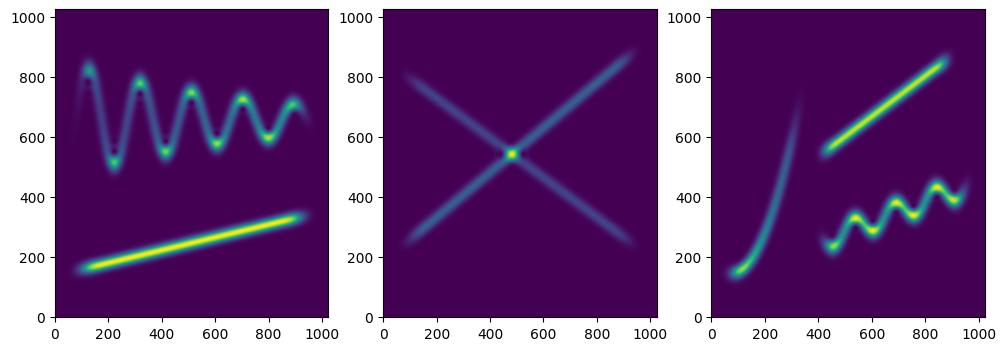

In [3]:
# Show the spectrogram of the signals used in the benchmarks.
signal_id = benchmark.signal_ids
N = benchmark.N
sb = SignalBank(N, return_signal=True)
signal_dict = sb.generate_signal_dict()
Nsignals = len(signal_id)

Nfft = 2*N
g,_ = get_round_window(Nfft)

fig, axs = plt.subplots(1,Nsignals,figsize=(4*Nsignals,4))
for i in range(Nsignals):
    signal = signal_dict[signal_id[i]]()
    Saux, _ = get_spectrogram(signal, window = g)
    axs[i].imshow(Saux, origin='lower', aspect='auto')

In [4]:
# Show the results of the benchmark as a DataFrame
filename = None
if filename is None:
    filename = '../results/last_benchmark_denoising'

with open(filename + '.pkl', 'rb') as f:
    benchmark = pickle.load(f)  
print(isinstance(benchmark,Benchmark))
# print(benchmark.methods_ids)
# results = benchmark.results
ri = ResultsInterpreter(benchmark)
df = ri.get_benchmark_as_data_frame()
df = ri.rearrange_data_frame(df)
df = df.reset_index()
col_names = list(df.columns)
df['Method'] = df['Method']+ '-' + df['Parameter']
# Save to csv
# df.to_csv('denoising_results.csv')
df

True


,index,SNRin,Method,Parameter,Signal_id,Repetition,QRF
0,0,-20,"brevdo_method-((), {})","((), {})",McCrossingChirps,0,-14.482878
1,1,-20,"brevdo_method-((), {})","((), {})",McCrossingChirps,1,-15.450098
2,2,-20,"brevdo_method-((), {})","((), {})",McCrossingChirps,2,-15.861816
3,3,-20,"brevdo_method-((), {})","((), {})",McCrossingChirps,3,-15.456798
4,4,-20,"brevdo_method-((), {})","((), {})",McCrossingChirps,4,-15.529346
...,...,...,...,...,...,...,...
3595,3595,20,"pseudo_bayesian_method-([], False, [], [], [],...","([], False, [], [], [], [], [], [], [], [])",McSyntheticMixture5,25,22.678202
3596,3596,20,"pseudo_bayesian_method-([], False, [], [], [],...","([], False, [], [], [], [], [], [], [], [])",McSyntheticMixture5,26,22.969756
3597,3597,20,"pseudo_bayesian_method-([], False, [], [], [],...","([], False, [], [], [], [], [], [], [], [])",McSyntheticMixture5,27,24.136919
3598,3598,20,"pseudo_bayesian_method-([], False, [], [], [],...","([], False, [], [], [], [], [], [], [], [])",McSyntheticMixture5,28,23.798547


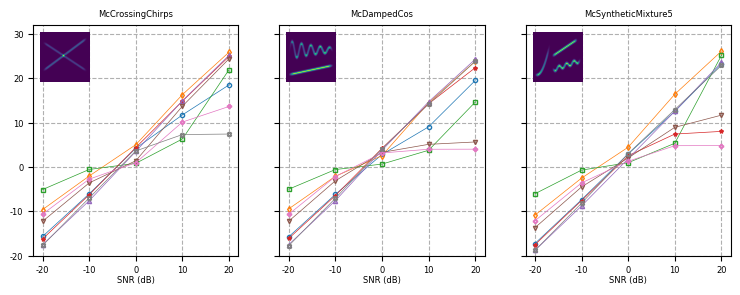

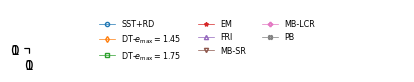

In [5]:
fig_w = 1.32
fig_h = 2.0
spsize = 0.5

signal_ids = np.unique(df['Signal_id'])
Nsignals = len(signal_ids)
fig, axs = plt.subplots(1,signal.total_comps,figsize=(3*Nsignals,3),sharey=True)

for i,sid in enumerate(signal_ids):
    # fig, axs = plt.subplots(1,1, figsize=(fig_w,fig_h),)
    df_aux = df[df['Signal_id']==sid]
    signal = signal_dict[sid]()

    axins = inset_axes(axs[i], width=spsize, height=spsize, loc=2) #loc=spectrogram_loc[i])
    S, _ = get_spectrogram(signal, window = g)    
    axins.imshow(S, origin='lower')
    axins.axis('off')
    fig.canvas.draw()
    axins.tick_params(axis='both', which='both', bottom=False, top=False, 
                    labelbottom=False, right=False, left=False, labelleft=False)
                    
    ri.get_snr_plot(df_aux, 
                    x='SNRin', 
                    y='QRF', 
                    hue='Method', 
                    axis = axs[i],
                    ms = 3,
                    linewidth=0.5,
                    # markevery=2,
                    markerfacecolor = 'none')

    # axs.get_legend().remove()
    axs[i].set_aspect('auto')
    axs[i].set_xticklabels([-20,-10,0,10,20],fontsize=6.0)
    axs[i].set_yticks([-20,-10,0,10,20,30])
    axs[i].set_yticklabels([-20,-10,0,10,20,30],fontsize=6.0)
    axs[i].set_xlabel(r'SNR (dB)', fontsize=6.0, labelpad=1)
    axs[i].set_ylim([-20,32])
    axs[i].set_title(sid, fontsize=6.0)
    axs[i].grid(True, linestyle='--', zorder=0)

new_legends = (r'SST+RD',r'DT-$e_{\max}=1.45$',r'DT-$e_{\max}=1.75$',r'EM',r'FRI',r'MB-SR',r'MB-LCR',r'PB')
legendFig = plt.figure(figsize=(4*fig_w,0.3))
h,l = axs[0].get_legend_handles_labels()
legendFig.legend(h,new_legends, 
            fontsize='xx-small', 
            frameon=False, 
            loc='center', 
            ncol=3
            )
legendFig.canvas.draw()
legendFig.add_axes([0,0,0,0])

plt.show()


## Component Retrieval

In [6]:
filename = None
if filename is None:
    filename = '../results/last_benchmark_component_denoising'

with open(filename + '.pkl', 'rb') as f:
    benchmark = pickle.load(f)  
print(isinstance(benchmark,Benchmark))
# print(benchmark.methods_ids)
results = benchmark.results
df = benchmark.dic2df(results)
# df = pd.DataFrame(results)
df = df.reset_index()
# df = df.drop(labels='level_3', axis=1)
col_names = list(df.columns)
col_names[0:5] = ['Signal Id.', 'SNR', 'Method','Parameters', 'Iteration']
df.columns = col_names
df['Method'] = df['Method']+ '-' + df['Parameters'] 
df

True


,Signal Id.,SNR,Method,Parameters,Iteration,Comp.0,Comp.1,Comp.2
0,McDampedCos,-20,"em_method-([], [], [], [], [], [], True)","([], [], [], [], [], [], True)",0,-16.021404,-15.651786,NaN
1,McDampedCos,-20,"em_method-([], [], [], [], [], [], True)","([], [], [], [], [], [], True)",1,-16.402588,-16.172837,NaN
2,McDampedCos,-20,"em_method-([], [], [], [], [], [], True)","([], [], [], [], [], [], True)",2,-15.571213,-16.960602,NaN
3,McDampedCos,-20,"em_method-([], [], [], [], [], [], True)","([], [], [], [], [], [], True)",3,-15.476626,-16.000678,NaN
4,McDampedCos,-20,"em_method-([], [], [], [], [], [], True)","([], [], [], [], [], [], True)",4,-16.010832,-16.335489,NaN
...,...,...,...,...,...,...,...,...
3595,McSyntheticMixture5,20,"pseudo_bayesian_method-([], False, [], [], [],...","([], False, [], [], [], [], [], [], [], [], True)",25,1.493418,26.615491,26.892842
3596,McSyntheticMixture5,20,"pseudo_bayesian_method-([], False, [], [], [],...","([], False, [], [], [], [], [], [], [], [], True)",26,0.27832,24.834218,26.52088
3597,McSyntheticMixture5,20,"pseudo_bayesian_method-([], False, [], [], [],...","([], False, [], [], [], [], [], [], [], [], True)",27,-0.010051,26.611403,26.655543
3598,McSyntheticMixture5,20,"pseudo_bayesian_method-([], False, [], [], [],...","([], False, [], [], [], [], [], [], [], [], True)",28,0.050609,26.782493,27.193088


McCrossingChirps
McDampedCos
McSyntheticMixture5


<Axes: >

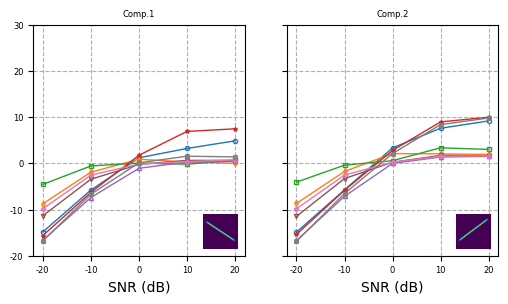

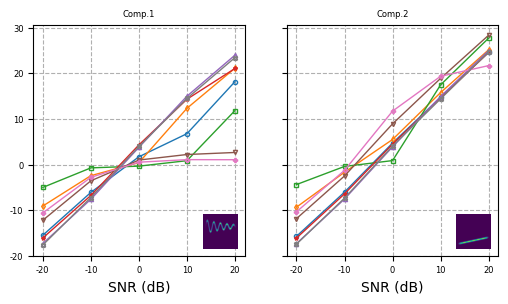

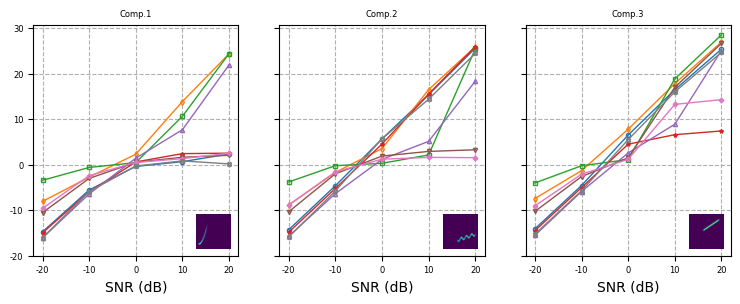

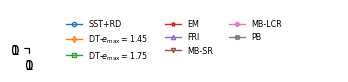

In [7]:
spsize = 0.35
signal_ids = np.unique(df['Signal Id.'])

N = benchmark.N
sb = SignalBank(N, return_signal=True)
signal_dict = sb.generate_signal_dict()

for i,sid in enumerate(signal_ids):
    print(sid)
    df_aux = df[df['Signal Id.']==sid]
    signal = signal_dict[sid]()

    fig, axs = plt.subplots(1,
                            signal.total_comps,figsize=(3*signal.total_comps,3),
                            sharey=True)
    
    for j in range(signal.total_comps):
        ResultsInterpreter.get_snr_plot(df_aux, 
                    x='SNR', 
                    y='Comp.{}'.format(j), 
                    hue='Method', 
                    axis = axs[j],
                    ms = 3,
                    linewidth=1.0,
                    markerfacecolor = 'none')

        S, _ = get_spectrogram(signal.comps[j],)
        axins = inset_axes(axs[j], width=spsize, height=spsize, loc=4) 
        axins.imshow(S, origin='lower')
        axins.axis('off')
        fig.canvas.draw()
        axins.tick_params(axis='both', which='both', bottom=False, top=False, 
                        labelbottom=False, right=False, left=False, labelleft=False)


        # Set the plot axis parameters.
        axs[j].set_xticklabels([-20,-10,0,10,20],fontsize=6.0)
        axs[j].set_yticks([-20,-10,0,10,20,30])
        axs[j].set_yticklabels([-20,-10,0,10,20,30],fontsize=6.0)
        axs[j].set_ylabel('')
        axs[j].set_title('Comp.{}'.format(j+1), fontsize=6.0)
        axs[j].grid(True, linestyle='--', zorder=0)

legendFig = plt.figure(figsize=(3*fig_w,0.3))
h,l = axs[j].get_legend_handles_labels()
legendFig.legend(h, new_legends, 
            fontsize='xx-small', 
            frameon=False, 
            loc='center', 
            ncol=3,
            )
legendFig.canvas.draw()
legendFig.add_axes([0,0,0,0])  

## Instantaneous Frequency Estimation

In [8]:
filename = None
if filename is None:
    filename = '../results/last_benchmark_inst_frequency'

with open(filename + '.pkl', 'rb') as f:
    benchmark = pickle.load(f)  
print(isinstance(benchmark,Benchmark))
# print(benchmark.methods_ids)
results = benchmark.results
df = benchmark.dic2df(results)
# df = pd.DataFrame(results)
df = df.reset_index()
# df = df.drop(labels='level_3', axis=1)
col_names = list(df.columns)
col_names[0:5] = ['Signal Id.', 'SNR', 'Method', 'Parameters', 'Iteration']
df.columns = col_names
df['Method'] = df['Method']+ '-' + df['Parameters']
df

True


,Signal Id.,SNR,Method,Parameters,Iteration,Comp.0,Comp.1,Comp.2
0,McDampedCos,-20,"em_method-([], [], [], [], [], [], [], True)","([], [], [], [], [], [], [], True)",0,0.020029,0.012383,NaN
1,McDampedCos,-20,"em_method-([], [], [], [], [], [], [], True)","([], [], [], [], [], [], [], True)",1,0.012181,0.034521,NaN
2,McDampedCos,-20,"em_method-([], [], [], [], [], [], [], True)","([], [], [], [], [], [], [], True)",2,0.01622,0.005102,NaN
3,McDampedCos,-20,"em_method-([], [], [], [], [], [], [], True)","([], [], [], [], [], [], [], True)",3,0.008349,0.03834,NaN
4,McDampedCos,-20,"em_method-([], [], [], [], [], [], [], True)","([], [], [], [], [], [], [], True)",4,0.017552,0.013916,NaN
...,...,...,...,...,...,...,...,...
3595,McSyntheticMixture5,20,"pseudo_bayesian_method-([], False, [], [], [],...","([], False, [], [], [], [], [], [], [], [], []...",25,0.009531,0.000007,0.000023
3596,McSyntheticMixture5,20,"pseudo_bayesian_method-([], False, [], [], [],...","([], False, [], [], [], [], [], [], [], [], []...",26,0.090327,0.000458,0.000021
3597,McSyntheticMixture5,20,"pseudo_bayesian_method-([], False, [], [], [],...","([], False, [], [], [], [], [], [], [], [], []...",27,0.102671,0.000012,0.000008
3598,McSyntheticMixture5,20,"pseudo_bayesian_method-([], False, [], [], [],...","([], False, [], [], [], [], [], [], [], [], []...",28,0.065114,0.000253,0.000016


McCrossingChirps
McDampedCos
McSyntheticMixture5


<Axes: >

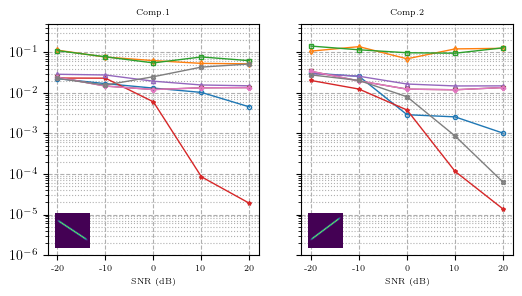

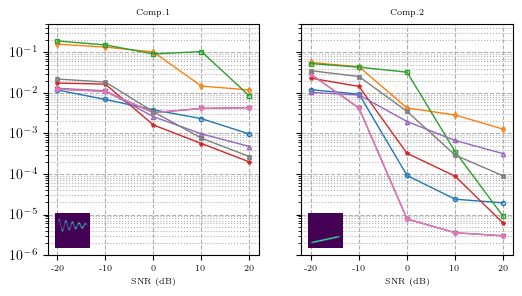

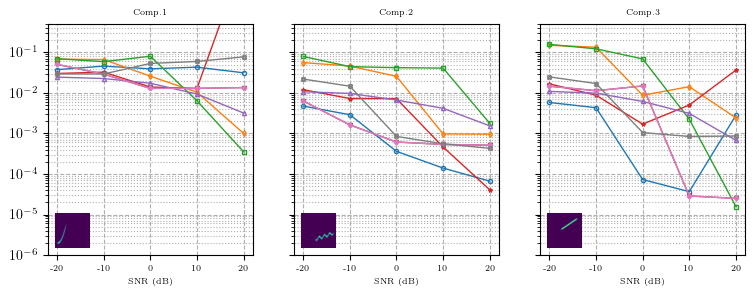

<Figure size 640x480 with 0 Axes>

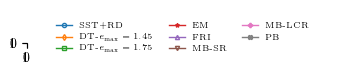

In [10]:
from benchmark_demo.ResultsInterpreter import ResultsInterpreter as ri

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

signal_ids = np.unique(df['Signal Id.'])

for i,sid in enumerate(signal_ids):
    print(sid)
    df_aux = df[df['Signal Id.']==sid]
    signal = signal_dict[sid]()

    fig, axs = plt.subplots(1,
                            signal.total_comps,figsize=(3*signal.total_comps,3),
                            sharey=True)

    for j in range(signal.total_comps):
        ri.get_snr_plot(df_aux, 
                    x='SNR', 
                    y='Comp.{}'.format(j), 
                    hue='Method', 
                    axis = axs[j],
                    ms = 3,
                    linewidth=1.0,
                    markerfacecolor = 'none',
                    plot_type='semilogy')

        S, _ = get_spectrogram(signal.comps[j])
        axins = inset_axes(axs[j], width=spsize, height=spsize, loc=3) 
        axins.imshow(S, origin='lower')
        axins.axis('off')
        fig.canvas.draw()
        axins.tick_params(axis='both', which='both', bottom=False, top=False, 
                        labelbottom=False, right=False, left=False, labelleft=False)


        axs[j].set_ylim([1e-6,0.5])
        axs[j].set_xticklabels([-20,-10,0,10,20],fontsize=6.0)
        axs[j].set_xlabel(axs[j].get_xlabel(), fontsize=6.0)
        axs[j].set_title('Component {}'.format(j+1), fontsize=6.0)
        axs[j].grid(True,linestyle='--', zorder=0)
        axs[j].grid(True,which='minor',linestyle=':', zorder=0)
    
        axs[j].set_ylabel('')
        axs[j].set_title('Comp.{}'.format(j+1), fontsize=6.0)
        axs[j].grid(True, linestyle='--', zorder=0)


legendFig = plt.figure()
legendFig = plt.figure(figsize=(3*fig_w,0.3))
legendFig.legend(h,new_legends, 
            fontsize='xx-small', 
            frameon=False, 
            loc='center', 
            ncol=3,
            )
legendFig.canvas.draw()
legendFig.add_axes([0,0,0,0])         